In [1]:
#!pip3 install cloudmesh-installer

In [2]:
!pip3 install cloudmesh-common

In [3]:
from cloudmesh.common.StopWatch import StopWatch
from cloudmesh.common.Shell import Shell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN, InputLayer, LSTM, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [4]:
file_url_1 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/NaturalGas_Supply_per_Region.csv?raw=true'
file_url_2 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Tem_korea.csv?raw=true'
file_url_3 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Tem_seoul.csv?raw=true'
file_url_4 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Tem_daegu.csv?raw=true'
file_url_5 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Tem_busan.csv?raw=true'
file_url_6 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/precipitation.csv?raw=true'
file_url_7 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Pre_seoul.csv?raw=true'
file_url_8 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Pre_daegu.csv?raw=true'
file_url_9 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Pre_busan.csv?raw=true'
file_url_10 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Crude_Oil_Price.csv?raw=true'
file_url_11 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Coal_CIF_ARA.xls?raw=true'
file_url_12 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Coal_Kalimantan.xls?raw=true'
file_url_13 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/Coal_Richards_Bay.xls?raw=true'
file_url_14 = 'https://github.com/cybertraining-dsc/sp21-599-356/blob/main/project/datasets/exchangerate.csv?raw=true'

destination_1 = '/content/sample_data/NaturalGas_Supply_per_Region.csv'
destination_2 = '/content/sample_data/Tem_korea.csv'
destination_3 = '/content/sample_data/Tem_seoul.csv'
destination_4 = '/content/sample_data/Tem_daegu.csv'
destination_5 = '/content/sample_data/Tem_busan.csv'
destination_6 = '/content/sample_data/precipitation.csv'
destination_7 = '/content/sample_data/Pre_seoul.csv'
destination_8 = '/content/sample_data/Pre_daegu.csv'
destination_9 = '/content/sample_data/Pre_busan.csv'
destination_10 = '/content/sample_data/Crude_Oil_Price.csv'
destination_11 = '/content/sample_data/Coal_CIF_ARA.xls'
destination_12 = '/content/sample_data/Coal_Kalimantan.xls'
destination_13 = '/content/sample_data/Coal_Richards_Bay.xls'
destination_14 = '/content/sample_data/exchangerate.csv'

Shell.download(file_url_1, destination_1, provider='system')
Shell.download(file_url_2, destination_2, provider='system')
Shell.download(file_url_3, destination_3, provider='system')
Shell.download(file_url_4, destination_4, provider='system')
Shell.download(file_url_5, destination_5, provider='system')
Shell.download(file_url_6, destination_6, provider='system')
Shell.download(file_url_7, destination_7, provider='system')
Shell.download(file_url_8, destination_8, provider='system')
Shell.download(file_url_9, destination_9, provider='system')
Shell.download(file_url_10, destination_10, provider='system')
Shell.download(file_url_11, destination_11, provider='system')
Shell.download(file_url_12, destination_12, provider='system')
Shell.download(file_url_13, destination_13, provider='system')
Shell.download(file_url_14, destination_14, provider='system')

'/content/sample_data/exchangerate.csv'

## Data Pre-Process

### Dataset Load

Load the dataset. Each dataset includes time-based monthly data.
1. The amount of natural gas supply (nine cities seperately)
2. The regional temperature (nine cities)
3. The regional precipitation (nine cities)
4. The price of crude oil (4-types) 
5. The price of coal (3-types)
6. The exchange rate between US Dollars(USD) and South Korea Won(KRW)

In [5]:
StopWatch.start("data-load")
## Natural gas dataset
ng_sup_df = pd.read_csv('sample_data/NaturalGas_Supply_per_Region.csv')
#ng_pro_df = pd.read_csv('sample_data/NaturalGas_Production.csv', encoding='CP949')

## Monthly average temperature dataset
tem_total = pd.read_csv('sample_data/Tem_korea.csv', encoding='CP949')
tem_df1 = pd.read_csv('sample_data/Tem_seoul.csv', encoding='CP949')
#tem_df2 = pd.read_csv('sample_data/Tem_Incheon.csv', encoding='CP949')
#tem_df3 = pd.read_csv('sample_data/Tem_suwon_kyunggi.csv', encoding='CP949')
#tem_df4 = pd.read_csv('sample_data/Tem_wonju_gangwon.csv', encoding='CP949')
#tem_df5 = pd.read_csv('sample_data/Tem_daejeon.csv', encoding='CP949')
#tem_df6 = pd.read_csv('sample_data/Tem_gunsan_jeonbuk.csv', encoding='CP949')
#tem_df7 = pd.read_csv('sample_data/Tem_gwangju.csv', encoding='CP949')
tem_df8 = pd.read_csv('sample_data/Tem_daegu.csv', encoding='CP949')
tem_df9 = pd.read_csv('sample_data/Tem_busan.csv', encoding='CP949')

## Monthly avarage precipation dataset
pre_total = pd.read_csv('sample_data/precipitation.csv', encoding='CP949')
pre_df1 = pd.read_csv('sample_data/Pre_seoul.csv', encoding='CP949')
#pre_df2 = pd.read_csv('sample_data/Pre_incheon.csv', encoding='CP949')
#pre_df3 = pd.read_csv('sample_data/Pre_suwon_kyunggi.csv', encoding='CP949')
#pre_df4 = pd.read_csv('sample_data/Pre_wonju_gangwon.csv', encoding='CP949')
#pre_df5 = pd.read_csv('sample_data/Pre_daejeon.csv', encoding='CP949')
#pre_df6 = pd.read_csv('sample_data/Pre_gunsan_jeonbuk.csv', encoding='CP949')
#pre_df7 = pd.read_csv('sample_data/Pre_gwangju.csv', encoding='CP949')
pre_df8 = pd.read_csv('sample_data/Pre_daegu.csv', encoding='CP949')
pre_df9 = pd.read_csv('sample_data/Pre_busan.csv', encoding='CP949')

## Crude oil price dataset
oil_df = pd.read_csv('sample_data/Crude_Oil_Price.csv')

## Coal price dataset
coal_df1 = pd.read_excel('sample_data/Coal_CIF_ARA.xls')
coal_df2  = pd.read_excel('sample_data/Coal_Kalimantan.xls')
coal_df3 = pd.read_excel('sample_data/Coal_Richards_Bay.xls')

## Exchange rate dataset
ex_df1 = pd.read_csv('sample_data/exchangerate.csv', encoding='CP949')
StopWatch.stop("data-load")

### Data preprocess_1

In [6]:
StopWatch.start("data-preprocess_1")
## Change column names to lowercase
df_names = [ng_sup_df, oil_df, coal_df1, coal_df2, coal_df3]
for name in df_names:
  name.columns = name.columns.str.lower()

## Split natural gas dataset
total_ng_df = ng_sup_df.iloc[:,2:]

## Consolidate temperature dataset
tem_df = pd.concat([tem_df1['avg_tem'],
                    tem_df8['avg_tem'],
                    tem_df9['avg_tem']],axis=1)
tem_df.columns = ['avg_tem_seoul',
                  'avg_tem_daegu',
                  'avg_tem_busan']

## Consolidate precipitation dataset
pre_df = pd.concat([pre_df1['avg_precipitation'],
                    pre_df8['avg_precipitation'],
                    pre_df9['avg_precipitation']],axis=1)
pre_df.columns = ['avg_pre_seoul',
                  'avg_pre_daegu',
                  'avg_pre_busan']

## Consolidate coal price dataset
coal_df = pd.concat([coal_df1['price'],coal_df2['price'],coal_df3['price']],axis=1)
coal_df.columns = ['coal_price_ca', 'coal_price_ka', 'coal_price_rb']

## Change exchange rate dataset shape
ex_df = ex_df1.transpose()
ex_df.columns = ['rate']
ex_df.index = list(range(48))

## Build objective dataset
df_total = pd.concat([ng_sup_df['seoul'], tem_df['avg_tem_seoul'], 
                      pre_df['avg_pre_seoul'],
                      oil_df[['dubai','brent','wti','oman']],
                      coal_df, ex_df['rate']], axis=1) 
df_total = df_total.iloc[:-1,:]
StopWatch.stop("data-preprocess_1")

In [7]:
#df_total = pd.concat([ng_sup_df.iloc[:,2:], tem_df, pre_df,
#                      oil_df[['dubai','brent','wti','oman']],
#                      coal_df, ex_df['rate']], axis=1) 
#df_total = df_total.iloc[:-1,:]

In [8]:
df_total.head()

,seoul,avg_tem_seoul,avg_pre_seoul,dubai,brent,wti,oman,coal_price_ca,coal_price_ka,coal_price_rb,rate
0,1110948.0,-3.2,53.0,26.86,31.93,31.78,27.12,45.50,46.33,40.02,1201.67
1,911323.0,0.2,52.0,28.87,33.53,30.62,29.55,43.58,45.67,42.06,1217.35
2,718859.0,7.0,51.0,35.24,39.79,37.96,36.40,45.92,45.89,43.16,1188.21
3,417299.0,14.1,55.0,38.99,43.34,41.12,39.93,45.81,44.92,43.55,1147.51
4,354428.0,19.6,56.0,44.26,47.65,46.80,44.95,48.24,45.98,42.58,1171.51


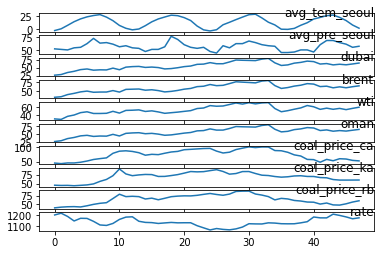

In [9]:
## Plot each column data
fig = plt.figure()
for i in range(1,df_total.shape[-1]):
  ax = fig.add_subplot(df_total.shape[-1]-1,1,i)
  ax.plot(df_total.iloc[:,i])
  ax.set_title(df_total.columns[i], y=0.5, loc='right')
plt.show()

In [22]:
## Make function which can convert normalized dataset to supervised dataset
def convert_dataset(dataset, num_i, num_o, dropnan=True):
  columns = []
  col_names = []
  conv_df = pd.DataFrame(dataset)
  for i in range(num_i, 0, -1):
    columns.append(conv_df.shift(periods=i))
    for j in range(dataset.shape[-1]):
      col_names.append('column{}(t-{})'.format(j+1,i))
  for i in range(num_o):
    columns.append(conv_df.shift(periods=-i))
    if i == 0:
      for j in range(dataset.shape[-1]):
        col_names.append('column{}(t)'.format(j+1))
    else:
      for j in range(dataset.shape[-1]):
        col_names.append('column{}(t+{})'.format(j+1, i))

  new_df = pd.concat(columns, axis=1)
  new_df.columns = col_names
  if dropnan:
    new_df.dropna(inplace=True)
  return new_df

In [63]:
def processed_dataset(dataset_norm, time_interval, boundary):
  new_df = convert_dataset(dataset_norm, time_interval, 1)
  new_df.drop(new_df.columns[list(range(dataset_norm.shape[-1]+1, 2*dataset_norm.shape[-1]))], axis=1, inplace=True)

  #values = new_df.values
  train = new_df.values[:boundary, :]
  test = new_df.values[boundary:,:]

  x_train, y_train = train[:, :-1], train[:, -1]
  x_test, y_test = test[:, :-1], test[:,-1]

  x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[-1])
  x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[-1])

  return x_train, y_train, x_test, y_test

In [64]:
def define_model(x_train, dropout, learning_rate):
  model = Sequential()
  ## LSTM Layers
  model.add(LSTM(100, input_shape = (x_train.shape[1], x_train.shape[2]),
                 return_sequences=True))
  model.add(LSTM(100, dropout=dropout,
                 return_sequences=False))

  ## MLP Layers
  model.add(Dense(100))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))
  model.add(Dense(100))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))
  model.add(Dense(1))
  model.add(Activation('relu'))

  opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='mae', optimizer=opt)
  model.summary()

  return model

In [65]:
def train_model(model, x_train, y_train, x_test, y_test, epoch):
  history = model.fit(x_train, y_train, 
                    epochs=epoch, 
                    validation_data=(x_test, y_test))
  return history

In [66]:
def loss_plot(history):
  k = list(range(1, len(history.history['loss'])+1))
  plt.plot(k, history.history['loss'], label='Train Loss')
  plt.plot(k, history.history['val_loss'], label='Validation Loss')
  plt.ylabel('Mean Absolute Error')
  plt.xlabel('Epoch')
  plt.legend()

  return plt.show()

In [67]:
def predicted_model(model, x_test, y_test, scaler):
  y_predicted = model.predict(x_test)
  x_test = x_test.reshape(x_test.shape[0], x_test.shape[2])
  x_te_re = x_test[:,1:]
  y_test = y_test.reshape(len(y_test), 1)

  inv_y_predicted = np.concatenate((y_predicted, x_te_re), axis=1)
  inv_y_predicted = scaler.inverse_transform(inv_y_predicted)[:,0]

  inv_y = np.concatenate((y_test, x_te_re), axis=1)
  inv_y = scaler.inverse_transform(inv_y)[:,0]

  rmse = np.sqrt(metrics.mean_squared_error(inv_y, inv_y_predicted))
  print('The RMSE is: %.4f' % rmse)

  plt.plot(inv_y, label='Real')
  plt.plot(inv_y_predicted, label='Prediction')
  plt.legend()
  
  return plt.show()

In [68]:
def predicted_time_model(model, x_test, y_test, scaler, time, feature):
  y_predicted = model.predict(x_test)
  x_test = x_test.reshape(x_test.shape[0], (time*feature))
  x_te_re = x_test[:,-(feature-1):]
  y_test = y_test.reshape(len(y_test), 1)

  inv_y_predicted = np.concatenate((y_predicted, x_te_re), axis=1)
  inv_y_predicted = scaler.inverse_transform(inv_y_predicted)[:,0]

  inv_y = np.concatenate((y_test, x_te_re), axis=1)
  inv_y = scaler.inverse_transform(inv_y)[:,0]

  rmse = np.sqrt(metrics.mean_squared_error(inv_y, inv_y_predicted))
  print('The RMSE is : %.4f' % rmse)

  plt.plot(inv_y, label='Real')
  plt.plot(inv_y_predicted, label='Prediction')
  plt.legend()
  
  return plt.show()

### Data preprocess_2

In [96]:
StopWatch.start("data-preprocess_2")
scaler = MinMaxScaler()
dataset_norm = scaler.fit_transform(df_total)
x_train, y_train, x_test, y_test = processed_dataset(dataset_norm, 1, 12)
StopWatch.stop("data-preprocess_2")

## Define Model

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 1, 100)            44800     
_________________________________________________________________
lstm_25 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_36 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_36 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_37 (Activation)   (None, 100)             

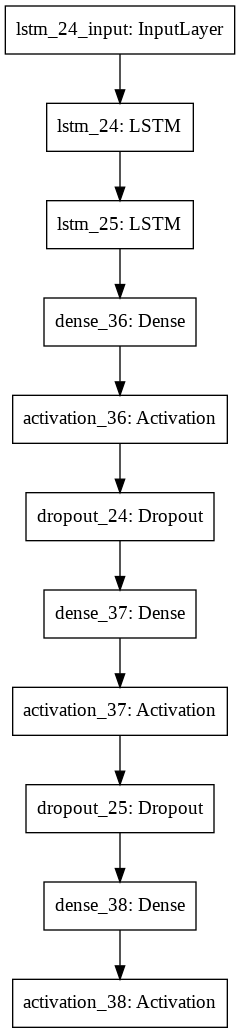

In [97]:
StopWatch.start("compile")
model = define_model(x_train, 0.1, 0.0005)
StopWatch.stop("compile")
tf.keras.utils.plot_model(model)

## Train

In [98]:
StopWatch.start("train")
history = train_model(model, x_train, y_train, x_test, y_test, 100)
StopWatch.stop("train")

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.2679 - val_loss: 0.3820
Epoch 2/100
1/1 [==============================] - 0s 66ms/step - loss: 0.2679 - val_loss: 0.3820
Epoch 3/100
1/1 [==============================] - 0s 70ms/step - loss: 0.2679 - val_loss: 0.3820
Epoch 4/100
1/1 [==============================] - 0s 72ms/step - loss: 0.2679 - val_loss: 0.3820
Epoch 5/100
1/1 [==============================] - 0s 67ms/step - loss: 0.2679 - val_loss: 0.3820
Epoch 6/100
1/1 [==============================] - 0s 72ms/step - loss: 0.2679 - val_loss: 0.3820
Epoch 7/100
1/1 [==============================] - 0s 66ms/step - loss: 0.2679 - val_loss: 0.3820
Epoch 8/100
1/1 [==============================] - 0s 71ms/step - loss: 0.2679 - val_loss: 0.3820
Epoch 9/100
1/1 [==============================] - 0s 78ms/step - loss: 0.2679 - val_loss: 0.3820
Epoch 10/100
1/1 [==============================] - 0s 77ms/step - loss: 0.2679 - val_loss: 0.3820
Epoch 11/100
1/1 [===

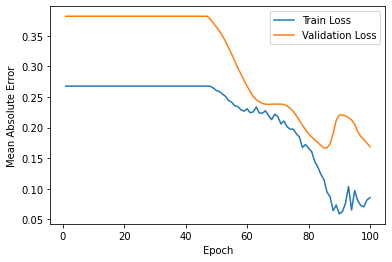

In [99]:
loss_plot(history)

## Predict

The RMSE is: 203995.4357


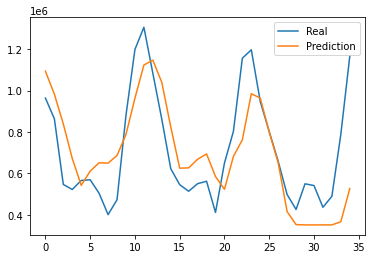

In [100]:
StopWatch.start("predict")
predicted_model(model, x_test, y_test, scaler)
StopWatch.stop("predict")

In [101]:
StopWatch.benchmark()


+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           

## Test1 - Climate dataset

In this test, the climate dataset is used to build a model. The dataset includes temperature data and precipitation data.

In [108]:
StopWatch.start("test1-data-preprocess_1")
df_total_ver_2 = pd.concat([ng_sup_df['seoul'], tem_df['avg_tem_seoul'], 
                      pre_df['avg_pre_seoul']], axis=1) 
StopWatch.stop("test1-data-preprocess_1")
df_total_ver_2.head()

,seoul,avg_tem_seoul,avg_pre_seoul
0,1110948,-3.2,53
1,911323,0.2,52
2,718859,7.0,51
3,417299,14.1,55
4,354428,19.6,56


In [109]:
StopWatch.start("test1-data-preprocess_2")
scaler2 = MinMaxScaler()
dataset_norm2 = scaler2.fit_transform(df_total_ver_2)
x_train2, y_train2, x_test2, y_test2 = processed_dataset(dataset_norm2, 1, 12)
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape
StopWatch.stop("test1-data-preprocess_2")

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 1, 100)            41600     
_________________________________________________________________
lstm_29 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_42 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_42 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_43 (Activation)   (None, 100)             

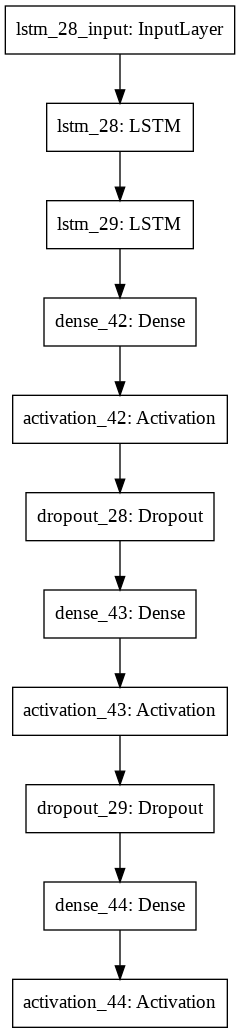

In [110]:
StopWatch.start("test2-compile")
model2 = define_model(x_train2, 0.1, 0.0004)
StopWatch.stop("test2-compile")
tf.keras.utils.plot_model(model2)

In [111]:
StopWatch.start("test1-train")
history2 = train_model(model2, x_train2, y_train2, x_test2, y_test2, 100)
StopWatch.stop("test1-train")

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.2673 - val_loss: 0.3756
Epoch 2/100
1/1 [==============================] - 0s 74ms/step - loss: 0.2631 - val_loss: 0.3704
Epoch 3/100
1/1 [==============================] - 0s 86ms/step - loss: 0.2598 - val_loss: 0.3654
Epoch 4/100
1/1 [==============================] - 0s 70ms/step - loss: 0.2575 - val_loss: 0.3602
Epoch 5/100
1/1 [==============================] - 0s 79ms/step - loss: 0.2546 - val_loss: 0.3548
Epoch 6/100
1/1 [==============================] - 0s 75ms/step - loss: 0.2519 - val_loss: 0.3492
Epoch 7/100
1/1 [==============================] - 0s 68ms/step - loss: 0.2501 - val_loss: 0.3433
Epoch 8/100
1/1 [==============================] - 0s 75ms/step - loss: 0.2472 - val_loss: 0.3373
Epoch 9/100
1/1 [==============================] - 0s 76ms/step - loss: 0.2444 - val_loss: 0.3312
Epoch 10/100
1/1 [==============================] - 0s 75ms/step - loss: 0.2399 - val_loss: 0.3250
Epoch 11/100
1/1 [===

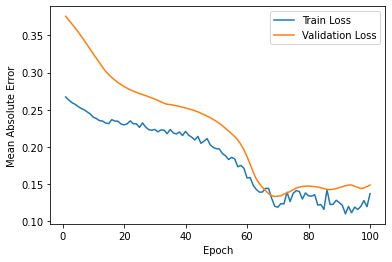

In [112]:
loss_plot(history2)

The RMSE is: 198446.2842


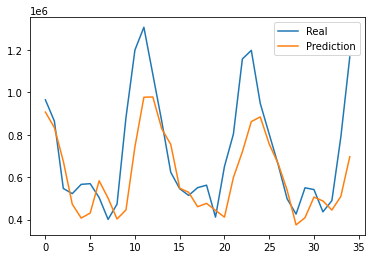

In [113]:
StopWatch.start("test1-predict")
predicted_model(model2, x_test2, y_test2, scaler2)
StopWatch.stop("test1-predict")

## Test2 - Temperature dataset

In this test, only a temperature dataset is used to build a model. The values of this dataset show that it is low in winter and high in summer.

In [114]:
StopWatch.start("test2-data-preprocess_1")
df_total_ver_3 = pd.concat([ng_sup_df['seoul'], tem_df['avg_tem_seoul']], axis=1)
StopWatch.stop("test2-data-preprocess_1")
df_total_ver_3.head()

,seoul,avg_tem_seoul
0,1110948,-3.2
1,911323,0.2
2,718859,7.0
3,417299,14.1
4,354428,19.6


In [115]:
StopWatch.start("test2-data-preprocess_2")
scaler3 = MinMaxScaler()
dataset_norm3 = scaler3.fit_transform(df_total_ver_3)
x_train3, y_train3, x_test3, y_test3 = processed_dataset(dataset_norm3, 1, 12)
StopWatch.stop("test2-data-preprocess_2")
x_train3.shape, y_train3.shape, x_test3.shape, y_test3.shape

((12, 1, 2), (12,), (35, 1, 2), (35,))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 1, 100)            41200     
_________________________________________________________________
lstm_33 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_48 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_48 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_49 (Activation)   (None, 100)             

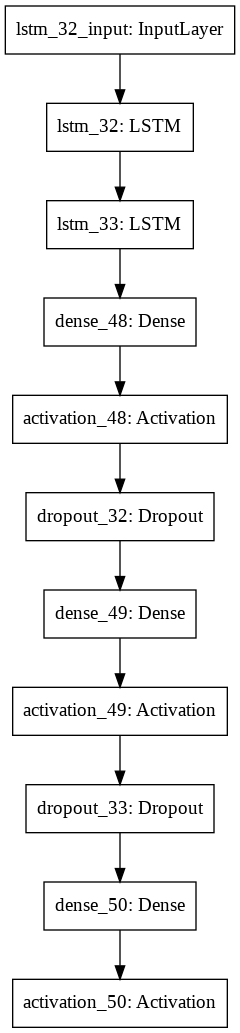

In [117]:
StopWatch.start("test2-compile")
model3 = define_model(x_train3, 0.1, 0.0004)
StopWatch.stop("test2-compile")
tf.keras.utils.plot_model(model3)

In [118]:
StopWatch.start("test2-train")
history3 = train_model(model3, x_train3, y_train3, x_test3, y_test3, 100)
StopWatch.stop("test2-train")

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.2665 - val_loss: 0.3751
Epoch 2/100
1/1 [==============================] - 0s 76ms/step - loss: 0.2631 - val_loss: 0.3699
Epoch 3/100
1/1 [==============================] - 0s 65ms/step - loss: 0.2606 - val_loss: 0.3648
Epoch 4/100
1/1 [==============================] - 0s 69ms/step - loss: 0.2578 - val_loss: 0.3596
Epoch 5/100
1/1 [==============================] - 0s 76ms/step - loss: 0.2546 - val_loss: 0.3542
Epoch 6/100
1/1 [==============================] - 0s 77ms/step - loss: 0.2530 - val_loss: 0.3485
Epoch 7/100
1/1 [==============================] - 0s 74ms/step - loss: 0.2497 - val_loss: 0.3427
Epoch 8/100
1/1 [==============================] - 0s 70ms/step - loss: 0.2465 - val_loss: 0.3365
Epoch 9/100
1/1 [==============================] - 0s 64ms/step - loss: 0.2428 - val_loss: 0.3301
Epoch 10/100
1/1 [==============================] - 0s 66ms/step - loss: 0.2391 - val_loss: 0.3238
Epoch 11/100
1/1 [===

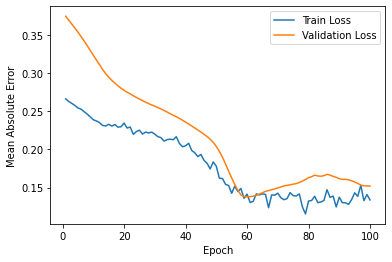

In [119]:
loss_plot(history3)

The RMSE is: 208628.8600


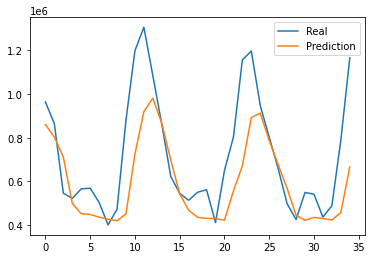

In [120]:
StopWatch.start("test2-predict")
predicted_model(model3, x_test3, y_test3, scaler3)
StopWatch.stop("test2-predict")

## Test3 - Applying timesteps

In this test, all dataset are used to build a model. The dataset is same to the first implementation, but timesteps are applied.

In [134]:
StopWatch.start("test3-data-preprocess_1")
df_total_ver_4 = df_total.copy()
StopWatch.stop("test3-data-preprocess_1")
df_total_ver_4.head()

,seoul,avg_tem_seoul,avg_pre_seoul,dubai,brent,wti,oman,coal_price_ca,coal_price_ka,coal_price_rb,rate
0,1110948.0,-3.2,53.0,26.86,31.93,31.78,27.12,45.50,46.33,40.02,1201.67
1,911323.0,0.2,52.0,28.87,33.53,30.62,29.55,43.58,45.67,42.06,1217.35
2,718859.0,7.0,51.0,35.24,39.79,37.96,36.40,45.92,45.89,43.16,1188.21
3,417299.0,14.1,55.0,38.99,43.34,41.12,39.93,45.81,44.92,43.55,1147.51
4,354428.0,19.6,56.0,44.26,47.65,46.80,44.95,48.24,45.98,42.58,1171.51


In [135]:
StopWatch.start("test3-data-preprocess_2")
scaler4 = MinMaxScaler()
dataset_norm4 = scaler4.fit_transform(df_total_ver_4)

months = 2
features = 11
n = months*features

new_df = convert_dataset(dataset_norm4, months, 1)
values = new_df.values
train4 = values[:12, :]
test4 = values[12:,:]

x_train4, y_train4 = train4[:, :n], train4[:, -features]
x_test4, y_test4 = test4[:, :n], test4[:,-features]

x_train4 = x_train4.reshape(x_train4.shape[0], months, features)
x_test4 = x_test4.reshape(x_test4.shape[0], months, features)
StopWatch.stop("test3-data-preprocess_2")
x_train4.shape, y_train4.shape, x_test4.shape, y_test4.shape

((12, 2, 11), (12,), (34, 2, 11), (34,))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 2, 100)            44800     
_________________________________________________________________
lstm_49 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_72 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_72 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_73 (Activation)   (None, 100)             

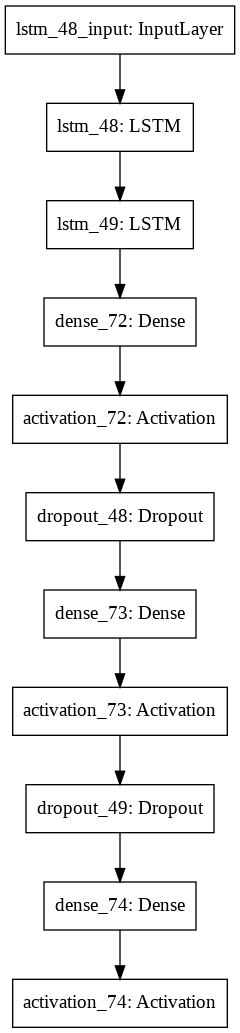

In [152]:
StopWatch.start("test3-compile")
model4 = define_model(x_train4, 0.4, 0.0004)
StopWatch.stop("test3-compile")
tf.keras.utils.plot_model(model4)

In [153]:
StopWatch.start("test3-train")
history4 = train_model(model4, x_train4, y_train4, x_test4, y_test4, 200)
StopWatch.stop("test3-train")

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 0.2692 - val_loss: 0.3640
Epoch 2/200
1/1 [==============================] - 0s 82ms/step - loss: 0.2662 - val_loss: 0.3574
Epoch 3/200
1/1 [==============================] - 0s 77ms/step - loss: 0.2714 - val_loss: 0.3514
Epoch 4/200
1/1 [==============================] - 0s 71ms/step - loss: 0.2598 - val_loss: 0.3443
Epoch 5/200
1/1 [==============================] - 0s 82ms/step - loss: 0.2571 - val_loss: 0.3369
Epoch 6/200
1/1 [==============================] - 0s 89ms/step - loss: 0.2494 - val_loss: 0.3291
Epoch 7/200
1/1 [==============================] - 0s 75ms/step - loss: 0.2479 - val_loss: 0.3204
Epoch 8/200
1/1 [==============================] - 0s 71ms/step - loss: 0.2434 - val_loss: 0.3117
Epoch 9/200
1/1 [==============================] - 0s 77ms/step - loss: 0.2510 - val_loss: 0.3031
Epoch 10/200
1/1 [==============================] - 0s 80ms/step - loss: 0.2388 - val_loss: 0.2946
Epoch 11/200
1/1 [===

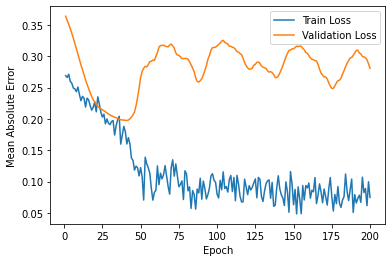

In [154]:
loss_plot(history4)

The RMSE is : 320317.8100


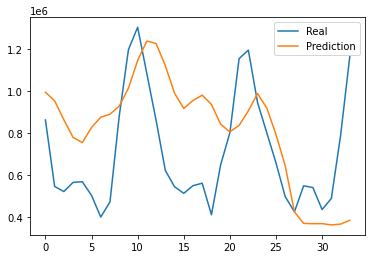

In [155]:
StopWatch.start("test3-predict")
predicted_time_model(model4, x_test4, y_test4, scaler4, months, features)
StopWatch.stop("test3-predict")

## Test4 - Country dataset

In [156]:
StopWatch.start("test4-data-preprocess_1")
df_total_country = pd.concat([ng_sup_df.sum(axis=1), tem_total['avg_tem'], 
                              pre_total['avg_precipitation'], 
                              oil_df[['dubai','brent','wti','oman']],
                              coal_df, ex_df['rate']], axis=1) 
df_total_country = df_total_country.iloc[:-1,:]
df_total_country = df_total_country.rename(columns = {0:'total'})
StopWatch.stop("test4-data-preprocess_1")
df_total_country.head()

,total,avg_tem,avg_precipitation,dubai,brent,wti,oman,coal_price_ca,coal_price_ka,coal_price_rb,rate
0,4250103.0,2.8,26.3,26.86,31.93,31.78,27.12,45.50,46.33,40.02,1201.67
1,3559794.0,8.8,58.2,28.87,33.53,30.62,29.55,43.58,45.67,42.06,1217.35
2,3182961.0,15.8,169.0,35.24,39.79,37.96,36.40,45.92,45.89,43.16,1188.21
3,2125051.0,21.8,221.2,38.99,43.34,41.12,39.93,45.81,44.92,43.55,1147.51
4,1978337.0,26.2,140.0,44.26,47.65,46.80,44.95,48.24,45.98,42.58,1171.51


In [157]:
StopWatch.start("test4-data-preprocess_2")
scaler5 = MinMaxScaler()
dataset_norm5 = scaler5.fit_transform(df_total_country)
x_train5, y_train5, x_test5, y_test5 = processed_dataset(dataset_norm5, 1, 12)
StopWatch.stop("test4-data-preprocess_2")

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 1, 100)            44800     
_________________________________________________________________
lstm_55 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_81 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_81 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_82 (Activation)   (None, 100)             

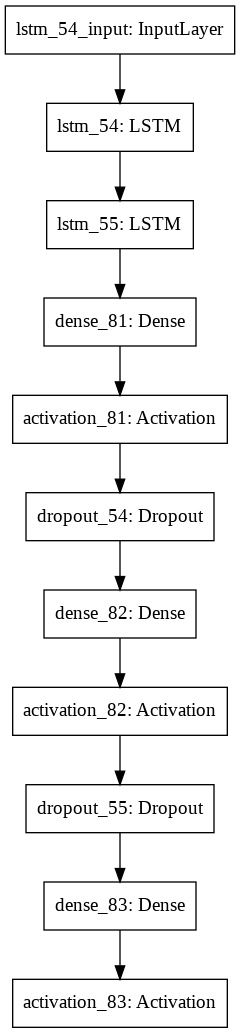

In [167]:
StopWatch.start("test4-compile")
model5 = define_model(x_train5, 0.3, 0.0005)
StopWatch.stop("test4-compile")
tf.keras.utils.plot_model(model5)

In [168]:
StopWatch.start("test4-train")
history5 = train_model(model5, x_train5, y_train5, x_test5, y_test5, 100)
StopWatch.stop("test4-train")

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.2538 - val_loss: 0.3709
Epoch 2/100
1/1 [==============================] - 0s 65ms/step - loss: 0.2521 - val_loss: 0.3638
Epoch 3/100
1/1 [==============================] - 0s 72ms/step - loss: 0.2483 - val_loss: 0.3562
Epoch 4/100
1/1 [==============================] - 0s 73ms/step - loss: 0.2421 - val_loss: 0.3489
Epoch 5/100
1/1 [==============================] - 0s 76ms/step - loss: 0.2389 - val_loss: 0.3417
Epoch 6/100
1/1 [==============================] - 0s 68ms/step - loss: 0.2326 - val_loss: 0.3343
Epoch 7/100
1/1 [==============================] - 0s 66ms/step - loss: 0.2302 - val_loss: 0.3269
Epoch 8/100
1/1 [==============================] - 0s 65ms/step - loss: 0.2245 - val_loss: 0.3200
Epoch 9/100
1/1 [==============================] - 0s 72ms/step - loss: 0.2224 - val_loss: 0.3131
Epoch 10/100
1/1 [==============================] - 0s 65ms/step - loss: 0.2163 - val_loss: 0.3060
Epoch 11/100
1/1 [===

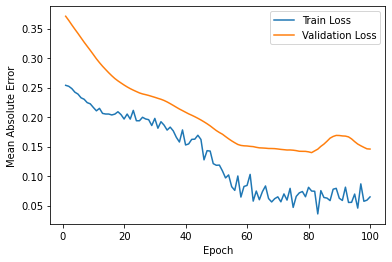

In [169]:
loss_plot(history5)

The RMSE is: 583627.2051


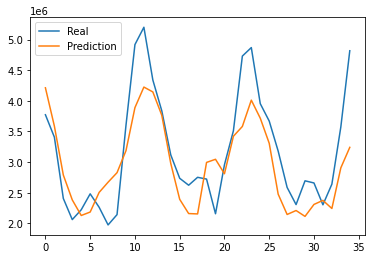

In [170]:
StopWatch.start("test4-predict")
predicted_model(model5, x_test5, y_test5, scaler5)
StopWatch.stop("test4-predict")

In [171]:
StopWatch.benchmark()


+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           

In [ ]:
yhat1 = model.predict(x_test1)
x_test1 = x_test1.reshape((x_test1.shape[0], n_months*n_features))

inv_yhat1 = np.concatenate((yhat1, x_test1[:, -10:]), axis=1)
inv_yhat1 = scaler.inverse_transform(inv_yhat1)
inv_yhat1 = inv_yhat1[:,0]

y_test1 = y_test1.reshape((len(y_test1),1))
inv_y1 = np.concatenate((y_test1, x_test1[:, -10:]),axis=1)
inv_y1 = scaler.inverse_transform(inv_y1)
inv_y1 = inv_y1[:,0]

rmse = np.sqrt(metrics.mean_squared_error(inv_y1, inv_yhat1))
print('Test RMSE: %.3f' % rmse)

In [305]:
## Normalize data using MinMax
scaler = MinMaxScaler()
dataset_norm = scaler.fit_transform(df_total)

n_months = 2
n_features = 11
reframed1 = data_to_supervised(dataset_norm, n_months, 1)

values1 = reframed1.values
train1 = values1[:12, :]
test1 = values1[12:,:]

n_obs = n_months * n_features
x_train1, y_train1 = train1[:,:n_obs], train1[:,-n_features]
x_test1, y_test1 = test1[:, :n_obs], test1[:,-n_features]
print(x_train1.shape, len(x_train1), y_train1.shape)
print(x_test1.shape, y_test1.shape)
print(y_train1)

x_train1 = x_train1.reshape((x_train1.shape[0], n_months, n_features))
x_test1 = x_test1.reshape((x_test1.shape[0], n_months, n_features))
print(x_train1.shape, x_test1.shape)

(12, 22) 12 (12,)
(34, 22) (34,)
[0.38501178 0.06915947 0.00330872 0.         0.05394396 0.07303902
 0.00842734 0.12231893 0.49538099 0.66337471 0.75381828 0.64168735]
(12, 2, 11) (34, 2, 11)


In [306]:
dropout = 0.4
lr = 0.0005
#StopWatch.start("compile")
model = Sequential()
## LSTM Layers
model.add(LSTM(100, input_shape = (x_train1.shape[1], x_train1.shape[2]),
               return_sequences=True))
model.add(LSTM(100, dropout=dropout,
               return_sequences=False))

## MLP Layers
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(1))
model.add(Activation('relu'))

opt = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='mae', optimizer=opt)
model.summary()
#StopWatch.stop("compile")

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_77 (LSTM)               (None, 2, 100)            44800     
_________________________________________________________________
lstm_78 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_114 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_114 (Activation)  (None, 100)               0         
_________________________________________________________________
dropout_76 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_115 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_115 (Activation)  (None, 100)             

In [307]:
history = model.fit(x_train1, y_train1, epochs=300, validation_data=(x_test1, y_test1))

Epoch 1/300
1/1 [==============================] - 6s 6s/step - loss: 0.2654 - val_loss: 0.3552
Epoch 2/300
1/1 [==============================] - 0s 63ms/step - loss: 0.2642 - val_loss: 0.3438
Epoch 3/300
1/1 [==============================] - 0s 69ms/step - loss: 0.2584 - val_loss: 0.3315
Epoch 4/300
1/1 [==============================] - 0s 65ms/step - loss: 0.2576 - val_loss: 0.3190
Epoch 5/300
1/1 [==============================] - 0s 58ms/step - loss: 0.2356 - val_loss: 0.3075
Epoch 6/300
1/1 [==============================] - 0s 66ms/step - loss: 0.2450 - val_loss: 0.2961
Epoch 7/300
1/1 [==============================] - 0s 61ms/step - loss: 0.2395 - val_loss: 0.2857
Epoch 8/300
1/1 [==============================] - 0s 69ms/step - loss: 0.2348 - val_loss: 0.2754
Epoch 9/300
1/1 [==============================] - 0s 73ms/step - loss: 0.2332 - val_loss: 0.2660
Epoch 10/300
1/1 [==============================] - 0s 66ms/step - loss: 0.2313 - val_loss: 0.2573
Epoch 11/300
1/1 [===

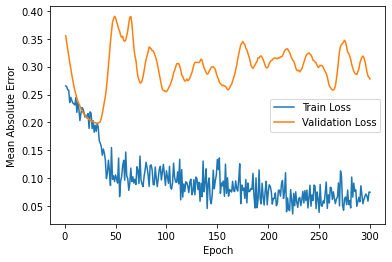

In [308]:
k = list(range(1, len(history.history['loss'])+1))
plt.plot(k, history.history['loss'], label='Train Loss')
plt.plot(k, history.history['val_loss'], label='Validation Loss')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [309]:
yhat1 = model.predict(x_test1)
x_test1 = x_test1.reshape((x_test1.shape[0], n_months*n_features))

inv_yhat1 = np.concatenate((yhat1, x_test1[:, -10:]), axis=1)
inv_yhat1 = scaler.inverse_transform(inv_yhat1)
inv_yhat1 = inv_yhat1[:,0]

y_test1 = y_test1.reshape((len(y_test1),1))
inv_y1 = np.concatenate((y_test1, x_test1[:, -10:]),axis=1)
inv_y1 = scaler.inverse_transform(inv_y1)
inv_y1 = inv_y1[:,0]

rmse = np.sqrt(metrics.mean_squared_error(inv_y1, inv_yhat1))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 314080.778


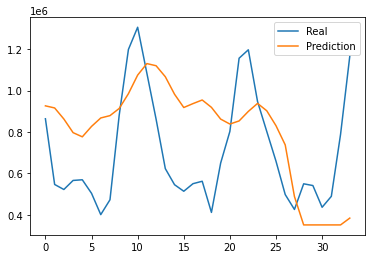

In [310]:
plt.plot(inv_y1, label='Real')
plt.plot(inv_yhat1, label='Prediction')
plt.legend()
plt.show()

In [440]:
df_test = pd.concat([ng_sup_df['seoul'], tem_df['avg_tem_seoul'], 
                      pre_df['avg_pre_seoul']], axis=1) 
df_test.head()

,seoul,avg_tem_seoul,avg_pre_seoul
0,1110948,-3.2,53
1,911323,0.2,52
2,718859,7.0,51
3,417299,14.1,55
4,354428,19.6,56


In [446]:
## Normalize data using MinMax
scaler = MinMaxScaler()
dataset_norm2 = scaler.fit_transform(df_test)

## Convert normalized dataset to supervised dataset
reframed2 = data_to_supervised(dataset_norm2, 1, 1)
reframed2.drop(reframed2.columns[[4,5]], axis=1, inplace=True)

## Split train, test dataset
values2 = reframed2.values
train2 = values2[:12, :]
test2 = values2[12:, :]

## Split input, output
x_train2, y_train2 = train2[:, :-1], train2[:, -1]
x_test2, y_test2 = test2[:, :-1], test2[:,-1]

## Reshape train and test dataset
x_train2 = x_train2.reshape((x_train2.shape[0], 1, x_train2.shape[-1]))
x_test2 = x_test2.reshape((x_test2.shape[0], 1, x_test2.shape[-1]))
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape

6
2


((12, 1, 3), (12,), (35, 1, 3), (35,))

In [445]:
dataset_norm2.shape

(48, 3)

In [ ]:
dropout = 0.2
lr = 0.0001
StopWatch.start("compile")
model = Sequential()
## LSTM Layers
model.add(LSTM(100, input_shape = (x_train2.shape[1], x_train2.shape[2]),
               return_sequences=True))
model.add(LSTM(100, dropout=dropout,
               return_sequences=False))

## MLP Layers
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(1))
model.add(Activation('relu'))

opt = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='mae', optimizer=opt)
model.summary()
StopWatch.stop("compile")

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 1, 100)            41600     
_________________________________________________________________
lstm_46 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_66 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_66 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_67 (Activation)   (None, 100)             

In [ ]:
StopWatch.start("train")
history = model.fit(x_train2, y_train2, 
                    epochs=300, 
                    validation_data=(x_test2, y_test2))
StopWatch.stop("train")

Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 0.2675 - val_loss: 0.3816
Epoch 2/300
1/1 [==============================] - 0s 55ms/step - loss: 0.2667 - val_loss: 0.3803
Epoch 3/300
1/1 [==============================] - 0s 56ms/step - loss: 0.2667 - val_loss: 0.3790
Epoch 4/300
1/1 [==============================] - 0s 56ms/step - loss: 0.2663 - val_loss: 0.3778
Epoch 5/300
1/1 [==============================] - 0s 64ms/step - loss: 0.2647 - val_loss: 0.3766
Epoch 6/300
1/1 [==============================] - 0s 63ms/step - loss: 0.2634 - val_loss: 0.3755
Epoch 7/300
1/1 [==============================] - 0s 57ms/step - loss: 0.2630 - val_loss: 0.3743
Epoch 8/300
1/1 [==============================] - 0s 56ms/step - loss: 0.2627 - val_loss: 0.3731
Epoch 9/300
1/1 [==============================] - 0s 53ms/step - loss: 0.2619 - val_loss: 0.3720
Epoch 10/300
1/1 [==============================] - 0s 52ms/step - loss: 0.2608 - val_loss: 0.3709
Epoch 11/300
1/1 [===

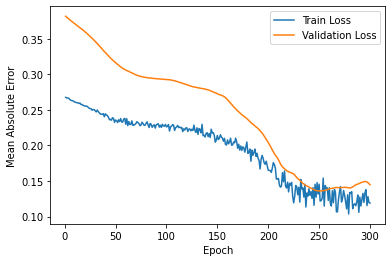

In [ ]:
k = list(range(1, len(history.history['loss'])+1))
plt.plot(k, history.history['loss'], label='Train Loss')
plt.plot(k, history.history['val_loss'], label='Validation Loss')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
yhat2 = model.predict(x_test2)
x_test2 = x_test2.reshape((x_test2.shape[0], x_test2.shape[2]))

inv_yhat2 = np.concatenate((yhat2, x_test2[:,1:]), axis=1)
inv_yhat2 = scaler.inverse_transform(inv_yhat2)
inv_yhat2 = inv_yhat2[:,0]

y_test2 = y_test2.reshape((len(y_test2), 1))
inv_y2 = np.concatenate((y_test2, x_test2[:, 1:]), axis=1)
inv_y2 = scaler.inverse_transform(inv_y2)
inv_y2 = inv_y2[:,0]

rmse = np.sqrt(metrics.mean_squared_error(inv_y2, inv_yhat2))

print('Test RMSE: %.3f' % rmse)

Test RMSE: 195456.590


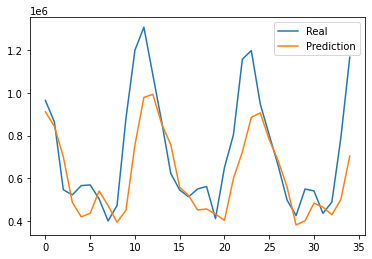

In [ ]:
plt.plot(inv_y2, label='Real')
plt.plot(inv_yhat2, label='Prediction')
plt.legend()
plt.show()

In [479]:
df_test2 = pd.concat([ng_sup_df['seoul'], tem_df['avg_tem_seoul']], axis=1) 

## Normalize data using MinMax
scaler = MinMaxScaler()
dataset_norm3 = scaler.fit_transform(df_test2)

## Convert normalized dataset to supervised dataset
reframed3 = data_to_supervised(dataset_norm3, 1, 1)
reframed3.drop(reframed3.columns[3], axis=1, inplace=True)

## Split train, test dataset
values3 = reframed3.values
train3 = values3[:12, :]
test3 = values3[12:, :]

## Split input, output
x_train3, y_train3 = train3[:, :-1], train3[:, -1]
x_test3, y_test3 = test3[:, :-1], test3[:,-1]

## Reshape train and test dataset
x_train3 = x_train3.reshape((x_train3.shape[0], 1, x_train3.shape[-1]))
x_test3 = x_test3.reshape((x_test3.shape[0], 1, x_test3.shape[-1]))
x_train3.shape, y_train3.shape, x_test3.shape, y_test3.shape

4
2


((12, 1, 2), (12,), (35, 1, 2), (35,))

In [480]:
dropout = 0.2
lr = 0.0001

model = Sequential()
## LSTM Layers
model.add(LSTM(100, input_shape = (x_train3.shape[1], x_train3.shape[2]),
               return_sequences=True))
model.add(LSTM(100, dropout=dropout,
               return_sequences=False))

## MLP Layers
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(1))
model.add(Activation('relu'))

opt = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='mae', optimizer=opt)
model.summary()
StopWatch.stop("compile")

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_113 (LSTM)              (None, 1, 100)            41200     
_________________________________________________________________
lstm_114 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dense_168 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_168 (Activation)  (None, 100)               0         
_________________________________________________________________
dropout_112 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_169 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_169 (Activation)  (None, 100)             

In [481]:
StopWatch.start("train")
history = model.fit(x_train3, y_train3, 
                    epochs=300, 
                    validation_data=(x_test3, y_test3))
StopWatch.stop("train")

Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 0.2665 - val_loss: 0.3790
Epoch 2/300
1/1 [==============================] - 0s 61ms/step - loss: 0.2652 - val_loss: 0.3778
Epoch 3/300
1/1 [==============================] - 0s 55ms/step - loss: 0.2645 - val_loss: 0.3766
Epoch 4/300
1/1 [==============================] - 0s 49ms/step - loss: 0.2640 - val_loss: 0.3754
Epoch 5/300
1/1 [==============================] - 0s 55ms/step - loss: 0.2624 - val_loss: 0.3741
Epoch 6/300
1/1 [==============================] - 0s 60ms/step - loss: 0.2624 - val_loss: 0.3729
Epoch 7/300
1/1 [==============================] - 0s 58ms/step - loss: 0.2614 - val_loss: 0.3717
Epoch 8/300
1/1 [==============================] - 0s 56ms/step - loss: 0.2602 - val_loss: 0.3704
Epoch 9/300
1/1 [==============================] - 0s 57ms/step - loss: 0.2600 - val_loss: 0.3692
Epoch 10/300
1/1 [==============================] - 0s 63ms/step - loss: 0.2590 - val_loss: 0.3679
Epoch 11/300
1/1 [===

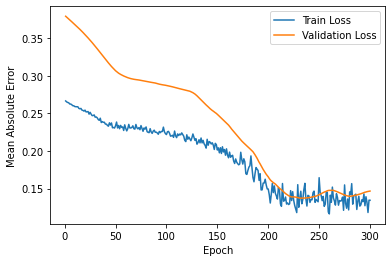

In [482]:
k = list(range(1, len(history.history['loss'])+1))
plt.plot(k, history.history['loss'], label='Train Loss')
plt.plot(k, history.history['val_loss'], label='Validation Loss')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [483]:
yhat3 = model.predict(x_test3)
x_test3 = x_test3.reshape((x_test3.shape[0], x_test3.shape[2]))

inv_yhat3 = np.concatenate((yhat3, x_test3[:,1:]), axis=1)
inv_yhat3 = scaler.inverse_transform(inv_yhat3)
inv_yhat3 = inv_yhat3[:,0]

y_test3 = y_test3.reshape((len(y_test3), 1))
inv_y3 = np.concatenate((y_test3, x_test3[:, 1:]), axis=1)
inv_y3 = scaler.inverse_transform(inv_y3)
inv_y3 = inv_y3[:,0]

rmse = np.sqrt(metrics.mean_squared_error(inv_y3, inv_yhat3))

print('Test RMSE: %.3f' % rmse)

Test RMSE: 199494.207


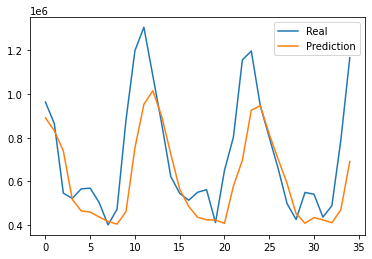

In [484]:
plt.plot(inv_y3, label='Real')
plt.plot(inv_yhat3, label='Prediction')
plt.legend()
plt.show()

In [ ]:
#df1 = pd.DataFrame(ng_df.iloc[:,2:])
#df2 = pd.DataFrame(tem_df1['avg_tem'])
#df3 = pd.DataFrame(oil_df[['dubai','brent','wti','oman']])
#df4 = pd.concat([coal_df1['price'],coal_df2['price'],coal_df3['price']],axis=1)
#df5 = pd.DataFrame(ex_df['rate'])
#df_seoul = pd.concat([df1,df2,df3,df4,ex_df],axis=1)
#df_seoul.head()
#df5.head()

In [ ]:
#df1 = pd.DataFrame(ng_df['seoul'])
#df2 = pd.DataFrame(tem_df1['avg_tem'])
#df3 = pd.DataFrame(oil_df[['dubai','brent','wti','oman']])
#df4 = pd.concat([coal_df1['price'],coal_df2['price'],coal_df3['price']],axis=1)
#df5 = pd.DataFrame(ex_df['rate'])
#df_seoul = pd.concat([df1,df2,df3,df4,ex_df],axis=1)
#df_seoul.head()
#df5.head()

In [ ]:
## train_test_split
x_train = dataset[0:36,1:]
x_test = dataset[36:,1:]
y_train = dataset[0:36,0]
y_test = dataset[36:,0]
print(x_train.shape[0])
print(x_test.shape[0])


#x_train, x_test, y_train, y_test = train_test_split(train_data, test_data,
#                                                    test_size=0.25,
#                                                    random_state=20)

36
12


In [ ]:
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (36, 10)
x_test.shape:  (12, 10)
y_train.shape:  (36,)
y_test.shape:  (12,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[-1])
x_test = x_test.reshape(x_test.shape[0] , 1, x_test.shape[-1])
#y_train = y_train.reshape(1, 36)
#y_test = y_test.reshape(1, 12)
print(x_train.shape)
print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

(36, 1, 10)
(12, 1, 10)


In [ ]:
#num_labels = len(y_train)
#input_shape = (36,10)
#units = 64
#dropout = 0.2

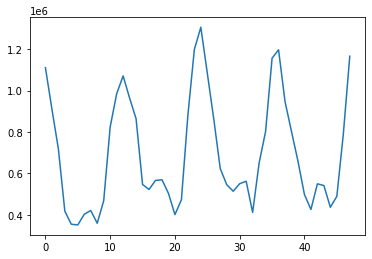

In [ ]:
plt.plot(df_total['seoul'])
plt.show()

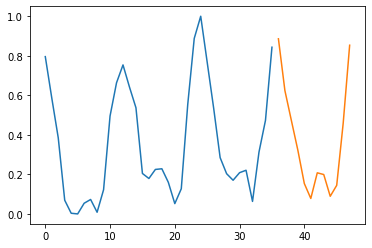

In [ ]:
plt.plot(list(range(0,36)), y_train)
plt.plot(list(range(36,48)),y_test)
plt.show()

## Define Model

In [ ]:
StopWatch.start("compile")
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[-1])))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))

model.summary()
plot_model(model, show_shapes=True)
#tf.keras.utils.plot_model(model)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt, metrics=['MeanSquaredError'])
StopWatch.stop("compile")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_5 (Activation)    (None, 1)                

## Train

In [ ]:
StopWatch.start("train")
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))
StopWatch.stop("train")

Epoch 1/500
2/2 [==============================] - 2s 525ms/step - loss: 0.2100 - mean_squared_error: 0.2100 - val_loss: 0.2116 - val_mean_squared_error: 0.2116
Epoch 2/500
2/2 [==============================] - 0s 46ms/step - loss: 0.2150 - mean_squared_error: 0.2150 - val_loss: 0.2093 - val_mean_squared_error: 0.2093
Epoch 3/500
2/2 [==============================] - 0s 47ms/step - loss: 0.1988 - mean_squared_error: 0.1988 - val_loss: 0.2070 - val_mean_squared_error: 0.2070
Epoch 4/500
2/2 [==============================] - 0s 47ms/step - loss: 0.2050 - mean_squared_error: 0.2050 - val_loss: 0.2046 - val_mean_squared_error: 0.2046
Epoch 5/500
2/2 [==============================] - 0s 50ms/step - loss: 0.2020 - mean_squared_error: 0.2020 - val_loss: 0.2022 - val_mean_squared_error: 0.2022
Epoch 6/500
2/2 [==============================] - 0s 49ms/step - loss: 0.1933 - mean_squared_error: 0.1933 - val_loss: 0.1996 - val_mean_squared_error: 0.1996
Epoch 7/500
2/2 [======================

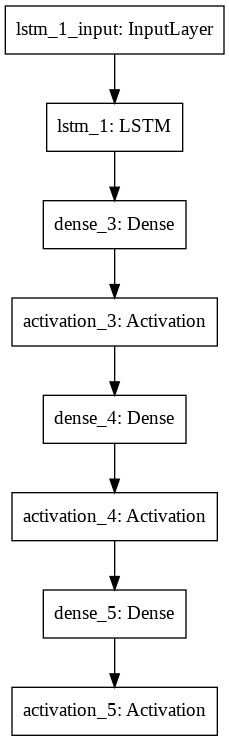

In [ ]:
#print(model.summary())
tf.keras.utils.plot_model(model)

In [ ]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

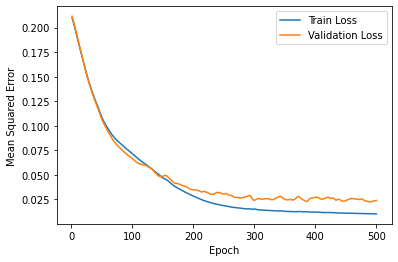

In [ ]:
ax = plt.gca()
k = list(range(1, len(history.history['loss'])+1))
plt.plot(k, history.history['loss'], label='Train Loss')
plt.plot(k, history.history['val_loss'], label='Validation Loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')

plt.legend()
plt.show()

In [ ]:
out = model.evaluate(x_test, y_test)
predictions = model(x_test)

1/1 [==============================] - 0s 23ms/step - loss: 0.0240 - mean_squared_error: 0.0240
